In [1]:
import numpy as np
import pandas as pd 
import cv2
from pathlib import Path
from fastai.vision import *
from fastai.vision.all import *
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
from glob import glob
%matplotlib inline

System nie może odnaleźć określonej ścieżki.


In [9]:
# Ścieżka do katalogu z obrazami
img_dir = 'data/images/images'
path = Path(img_dir)

# Definicja DataBlock
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,   # Pobiera wszystkie pliki obrazów z folderu
    splitter=RandomSplitter(valid_pct=0.2, seed=42),  # Split na dane treningowe i walidacyjne
    get_y=parent_label,  # Pobiera etykiety z nazw folderów
    item_tfms=Resize(299),  # Rozmiar obrazu po załadowaniu
    batch_tfms=aug_transforms(size=299)  # Augmentacja danych
)

# Tworzenie DataLoaders
data = dblock.dataloaders(path, bs=64, num_workers=0)

# Wyświetlenie klas
print(f'Classes: \n {data.vocab}')


Classes: 
 ['Albrecht_Dürer', 'Alfred_Sisley', 'Amedeo_Modigliani', 'Andrei_Rublev', 'Andy_Warhol', 'Camille_Pissarro', 'Caravaggio', 'Claude_Monet', 'Diego_Rivera', 'Diego_Velazquez', 'Edgar_Degas', 'Edouard_Manet', 'Edvard_Munch', 'El_Greco', 'Eugene_Delacroix', 'Francisco_Goya', 'Frida_Kahlo', 'Georges_Seurat', 'Giotto_di_Bondone', 'Gustav_Klimt', 'Gustave_Courbet', 'Henri_Matisse', 'Henri_Rousseau', 'Henri_de_Toulouse-Lautrec', 'Hieronymus_Bosch', 'Jackson_Pollock', 'Jan_van_Eyck', 'Joan_Miro', 'Kazimir_Malevich', 'Leonardo_da_Vinci', 'Marc_Chagall', 'Michelangelo', 'Mikhail_Vrubel', 'Pablo_Picasso', 'Paul_Cezanne', 'Paul_Gauguin', 'Paul_Klee', 'Peter_Paul_Rubens', 'Pierre-Auguste_Renoir', 'Piet_Mondrian', 'Pieter_Bruegel', 'Raphael', 'Rembrandt', 'Rene_Magritte', 'Salvador_Dali', 'Sandro_Botticelli', 'Titian', 'Vasiliy_Kandinskiy', 'Vincent_van_Gogh', 'William_Turner']


In [11]:
# Definicja ścieżki do modelu
model_dir = Path("/kaggle/working/")

# Tworzenie modelu i jego uczenie
learn = cnn_learner(data, resnet50, metrics=accuracy, model_dir=model_dir)
learn.fit_one_cycle(3)


C:\Users\agawr\anaconda3\lib\site-packages\fastai\vision\learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to C:\Users\agawr/.cache\torch\hub\checkpoints\resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:05<00:00, 17.5MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,2.777225,1.509871,0.603316,1:10:12
1,1.668773,1.182341,0.694494,1:10:42
2,1.178447,1.134546,0.699230,1:11:10


In [12]:
learn.fit_one_cycle(20)

epoch,train_loss,valid_loss,accuracy,time
0,1.033388,1.055819,0.725281,1:09:16
1,1.002850,1.011871,0.725873,1:08:30
2,0.953898,0.949781,0.733570,1:07:24
3,0.837294,0.922275,0.738307,1:07:18
4,0.775030,0.880827,0.751924,1:07:45
5,0.650132,0.799276,0.774423,1:07:54
6,0.547391,0.805859,0.775015,1:08:06
7,0.501788,0.765031,0.786856,1:07:46
8,0.407507,0.770148,0.782712,1:08:14
9,0.381860,0.758412,0.788632,1:08:09


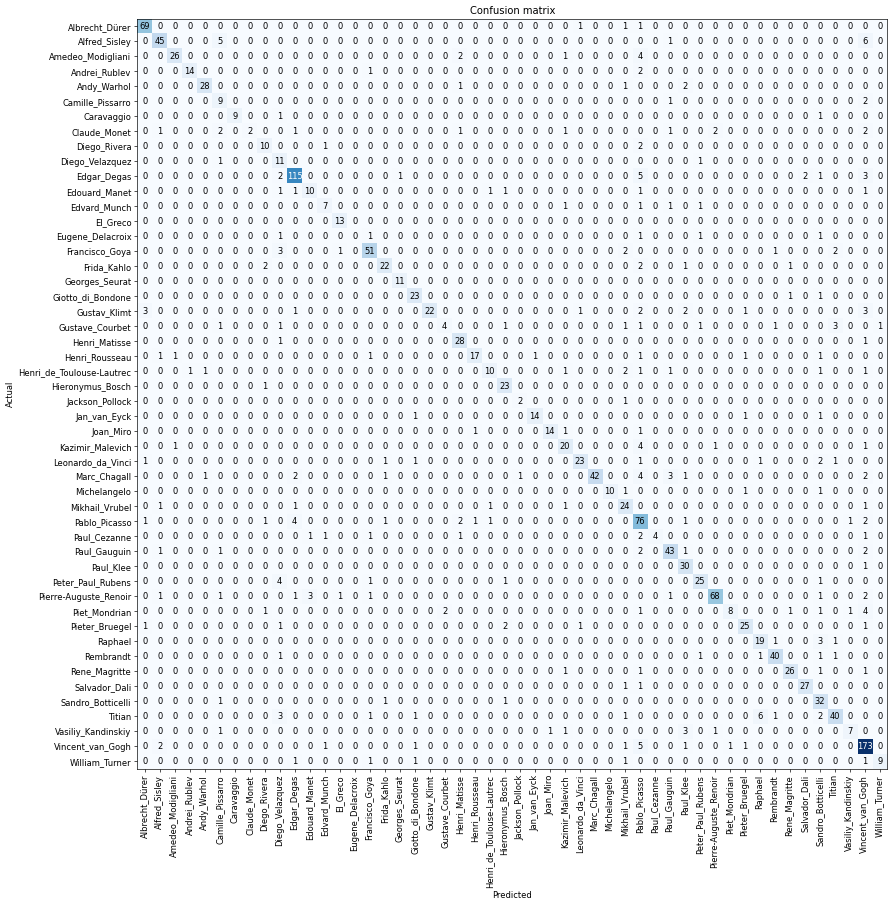

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(15,15), dpi=60)

In [7]:
from fastai.vision.all import *

In [6]:
!pip install fastai

  Using cached fastai-2.7.17-py3-none-any.whl (234 kB)
  Using cached torchvision-0.19.1-cp39-cp39-win_amd64.whl (1.3 MB)
  Using cached fastprogress-1.0.3-py3-none-any.whl (12 kB)
  Using cached fastdownload-0.0.7-py3-none-any.whl (12 kB)
  Using cached torch-2.4.1-cp39-cp39-win_amd64.whl (199.3 MB)
  Using cached spacy-3.7.6-cp39-cp39-win_amd64.whl (12.2 MB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl (22 kB)
  Using cached weasel-0.4.1-py3-none-any.whl (50 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl (27 kB)
  Using cached murmurhash-1.0.10-cp39-cp39-win_amd64.whl (25 kB)
  Using cached cymem-2.0.8-cp39-cp39-win_amd64.whl (39 kB)
  Using cached langcodes-3.4.0-py3-none-any.whl (182 kB)
  Using cached typer-0.12.5-py3-none-any.whl (47 kB)
  Using cached srsly-2.4.8-cp39-cp39-win_amd64.whl (483 kB)
  Using cached thinc-8.2.5-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl (29 kB)
  Using cached preshed-3.0.9-cp39-cp39-win_amd64.whl 

In [4]:
# Sprawdzenie, co jest przechowywane w learn.recorder
print(learn.recorder)



NameError: name 'learn' is not defined

In [ ]:
# Wyciąganie wyników z learn.recorder w fastai v2
import pandas as pd

# Zakładając, że learn jest obiektem Learner
epochs = len(learn.recorder.losses)
results = {
    'epoch': list(range(epochs)),
    'train_loss': [float(loss) for loss in learn.recorder.losses],
    'valid_loss': [float(loss) for loss in learn.recorder.val_losses],
    'accuracy': [float(acc[0]) for acc in learn.recorder.metrics],
    'val_accuracy': [float(acc[1]) if len(acc) > 1 else None for acc in learn.recorder.metrics]
}

df_results = pd.DataFrame(results)
print(df_results)


In [ ]:
# Wyciąganie wyników po treningu
if 'learn' in locals():
    # Wyciąganie wyników
    losses = learn.recorder.losses
    val_losses = learn.recorder.val_losses
    metrics = learn.recorder.metrics
    
    # Tworzenie DataFrame
    df_results = pd.DataFrame({
        'epoch': range(len(losses)),
        'train_loss': [loss.item() for loss in losses],
        'valid_loss': [loss.item() for loss in val_losses],
        'accuracy': [metric[0].item() if len(metric) > 0 else None for metric in metrics],
        'val_accuracy': [metric[1].item() if len(metric) > 1 else None for metric in metrics]
    })
    
    print(df_results)
else:
    print("Obiekt 'learn' nie jest zdefiniowany.")
